# Drug Discovery Project

In [2]:
# Import
import pandas as pd
import numpy as np
from pathlib import Path

In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem

RDKit WARNING: [17:39:17] Enabling RDKit 2019.09.3 jupyter extensions


In [5]:
DATA = Path('../dataset/13321_2017_226_MOESM1_ESM/')
NB_DIR = Path.cwd()
LOCALDATA = NB_DIR/'..'/'dataset'/'temp'
#df = pd.read_csv('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL205_cl.csv', index_col=0)

In [6]:
#df.head()
list(DATA.iterdir())

[PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL1978_cl.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL218_cl.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL240_cl.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/RdkitDescriptors.py'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL219_cl.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL205_cl.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL301_cl.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL244_cl.csv')]

# RdkitDescriptors

In [7]:
rdkitdes = str(DATA) + '/RdkitDescriptors.py'

In [22]:
# function for returning fingerprint from a specific smile.

def get_fp(smile, diam = 2, bits = 1024, verbose = 0):

    mol = Chem.MolFromSmiles(smile)
    Chem.SanitizeMol(mol)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, diam, nBits = bits)
    
    if verbose:
        print(f"Smile: {smile} ")
        display(mol)
        
    return fp

Smile: S(=O)(=O)(N)c1ccc(cc1)CCNc1nc(nc(n1)NC)NC 


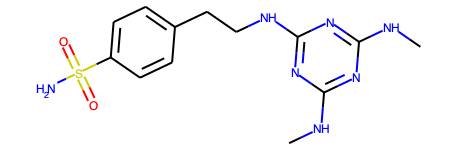

CPU times: user 8.78 ms, sys: 7.93 ms, total: 16.7 ms
Wall time: 20.5 ms


In [23]:
%%time
fp = get_fp(
            smile = "S(=O)(=O)(N)c1ccc(cc1)CCNc1nc(nc(n1)NC)NC",
            diam = 2,
            bits = 1024,
            verbose = 1
            )

In [33]:
#ECFP4
#Generated Circular fingerprints hashed into n bits length vectors.

def ECFP(ifile, ofile, diam, bits):
    
    print(f"Reading data from file: {ifile}")
    df = pd.read_csv(ifile)
    print(f"Headers: {list(df.columns)}")
    
    df.insert(2, "ECFP4_", df.SMILES.apply(get_fp))
    
    df[[f"ECFP4_[i+1]" for i in range(len(df.ECFP4_[0]))]] = df.ECFP4_.to_list()
    
    df.drop("ECFP4_", axis = 1, inplace = True)
    
    
    df.to_csv(LOCALDATA/ofile, index = None)
    return df

# Run the functions on a file from dataset and store the results

In [34]:
ECFP(DATA/'CHEMBL205_cl.csv', 'CHEMBL205_cl_ecfp_1024.csv', 2, 1024)

Reading data from file: ../dataset/13321_2017_226_MOESM1_ESM/CHEMBL205_cl.csv
Headers: ['CID', 'SMILES', 'Activity']


KeyError: "None of [Index(['ECFP4_[i+1]', 'ECFP4_[i+1]', 'ECFP4_[i+1]', 'ECFP4_[i+1]',\n       'ECFP4_[i+1]', 'ECFP4_[i+1]', 'ECFP4_[i+1]', 'ECFP4_[i+1]',\n       'ECFP4_[i+1]', 'ECFP4_[i+1]',\n       ...\n       'ECFP4_[i+1]', 'ECFP4_[i+1]', 'ECFP4_[i+1]', 'ECFP4_[i+1]',\n       'ECFP4_[i+1]', 'ECFP4_[i+1]', 'ECFP4_[i+1]', 'ECFP4_[i+1]',\n       'ECFP4_[i+1]', 'ECFP4_[i+1]'],\n      dtype='object', length=1024)] are in the [columns]"

In [ ]:
df = pd.read_csv(LOCALDATA/'CHEMBL205_cl_ecfp_1024.csv')

In [ ]:
df.head()